# Autoencoders

- It is a simple neural network designed to reproduce its input in the output layer.
- The number of input neurons is equal to the number of output neurons.
- The number of neurons is reduced and then increased again in the hidden layers, like: 5, 3, 2, 3, 5.

- An autoencoder, the is formed by two parts: 
  - Encoder: Input layer > Hidden layer (applies linear transformation)
  - Decoder: Hidden layer > Output layer (applies linear transformation)
  
- Usually weights in the Encoder will be the same (transposed) than in the Decoder, this is called "Tied weights".
- Only weights are tied, **Biases** are not tied!
- Autoencoders where the number of neurons in the hidden layers is reduced are called "Under complete auto encoders"
- This makes that the internal hidden layer has to learn a representation of the input with less neurons, extracting meaninful features. Obtaining a compressed representation of the input.

## Dimensionality Reduction with Linear Autoencoders

- Linear Autoencoders can be used to perform PCA (principal component analysis)
- Linear Autoencoders do not use activation functions, they only perform linear transformations on input data.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [27]:
data = make_blobs(n_samples=100, n_features=3, centers=5, random_state=101)

In [28]:
type(data)

tuple

In [7]:
data[0]

array([[  0.99429187,   0.87511711,  -9.99909683],
       [  0.65761885,   0.91624771, -10.18458517],
       [ -6.48804352,   3.29034852,   6.73159871],
       [  0.5815206 ,   2.06249948,  -9.07157495],
       [ -7.42442678,   5.30835517,   6.86341624],
       [  2.26790487,   0.40816482, -10.17230518],
       [  1.62073713,  -0.05416228,  -9.92461083],
       [  2.41199108,   1.03683306,  -9.20017913],
       [ -7.62441747,   5.87096075,   5.41069708],
       [ -7.34160752,   3.671108  ,   7.36634568],
       [ -7.56358517,   3.5736335 ,   5.34284552],
       [  2.22972735,   1.6514787 ,  -7.43386319],
       [ -0.75249891,   2.31574949,  -9.26873428],
       [  0.54946324,   0.5581557 ,  -7.88852506],
       [ -0.4308995 ,   0.48011452,  -8.47545896],
       [ -1.19436032,   2.54705473,  -8.90232874],
       [ -0.06318407,   2.4416449 , -11.40312057],
       [ -6.70999871,   3.8246846 ,   7.34365184],
       [  1.32054601,   2.60559237, -10.47729501],
       [  0.15391601,   2.19349

In [6]:
data[1]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [30]:
data_x = scaled_data[:, 0]
data_y = scaled_data[:, 1]
data_z = scaled_data[:, 2]

In [11]:
from mpl_toolkits.mplot3d import Axes3D

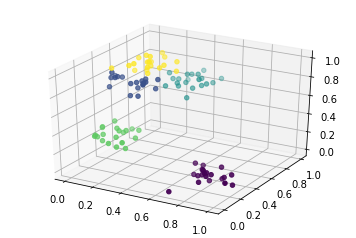

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x, data_y, data_z, c=data[1])

In [15]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected_connected

In [32]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [33]:
learning_rate = 0.01

In [34]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [35]:
# Remember! Linear autoencoders do not use activation function
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [36]:
loss = tf.reduce_mean(tf.square(outputs - X))

In [37]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [38]:
train = optimizer.minimize(loss)

In [39]:
init = tf.global_variables_initializer()

In [40]:
num_steps = 1000

with tf.Session() as sess:
    
    sess.run(init)
    
    for iteration in range(num_steps):
        
        sess.run(train, feed_dict = { X: scaled_data })
        
    output_2d = hidden.eval(feed_dict = { X: scaled_data })
    
    

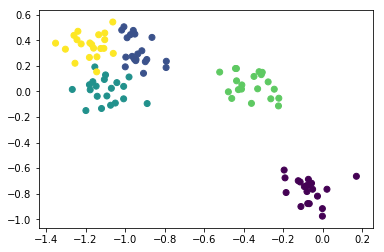

In [41]:
plt.scatter(output_2d[:,0], output_2d[:,1], c=data[1])

## Stacked Ao